In [78]:
import pandas as pd
dataInFolder = './../data/'

In [79]:
kmdb = pd.read_csv(dataInFolder + 'kmdb_get_movie_list_20231103.csv')
column_dict = {
     'movieCd':'영화코드', 'movieNm':'영화명국문', 'movieNmEn':'영화명(영문)', 
   'prdtYear':'제작연도', 'openDt':'개봉일', 'typeNm':'영화유형', 
   'prdtStatNm':'제작상태', 'nationAlt':'제작국가(전체)', 'genreAlt':'영화장르(전체)', 
   'repNationNm':'대표 제작 국가', 'repGenreNm':'대표 장르'    
}
kmdb = kmdb.rename(columns=column_dict)
print(kmdb.columns)
kmdb.head()

Index(['영화코드', '영화명국문', '영화명(영문)', '제작연도', '개봉일', '영화유형', '제작상태', '제작국가(전체)',
       '영화장르(전체)', '대표 제작 국가', '대표 장르'],
      dtype='object')


,영화코드,영화명국문,영화명(영문),제작연도,개봉일,영화유형,제작상태,제작국가(전체),영화장르(전체),대표 제작 국가,대표 장르
0,20230966,사채소년,NaN,2023.0,NaN,장편,개봉예정,한국,액션,한국,액션
1,19820019,만추 리마스터링,Late Autumn,2010.0,20110217.0,장편,개봉,"한국,미국,홍콩",멜로/로맨스,한국,멜로/로맨스
2,20070458,냉정과 열정사이,Between Calm And Passion,2001.0,20031010.0,장편,개봉,일본,"멜로/로맨스,드라마",일본,멜로/로맨스
3,20226500,달짝지근해: 7510,HONEYSWEET,2022.0,20230815.0,장편,개봉,한국,코미디,한국,코미디
4,20235004,여귀교- 저주를 부르는 게임,The Bridge Curse : Ritua,2023.0,NaN,장편,개봉예정,대만,공포(호러),대만,공포(호러)


In [80]:
openYear = [str(item)[0:4] for item in kmdb['개봉일']]
kmdb['개봉년도'] = openYear
kmdb['개봉년월'] = [str(item)[0:6] for item in kmdb['개봉일']]
kmdb.head()

,영화코드,영화명국문,영화명(영문),제작연도,개봉일,영화유형,제작상태,제작국가(전체),영화장르(전체),대표 제작 국가,대표 장르,개봉년도,개봉년월
0,20230966,사채소년,NaN,2023.0,NaN,장편,개봉예정,한국,액션,한국,액션,nan,nan
1,19820019,만추 리마스터링,Late Autumn,2010.0,20110217.0,장편,개봉,"한국,미국,홍콩",멜로/로맨스,한국,멜로/로맨스,2011,201102
2,20070458,냉정과 열정사이,Between Calm And Passion,2001.0,20031010.0,장편,개봉,일본,"멜로/로맨스,드라마",일본,멜로/로맨스,2003,200310
3,20226500,달짝지근해: 7510,HONEYSWEET,2022.0,20230815.0,장편,개봉,한국,코미디,한국,코미디,2023,202308
4,20235004,여귀교- 저주를 부르는 게임,The Bridge Curse : Ritua,2023.0,NaN,장편,개봉예정,대만,공포(호러),대만,공포(호러),nan,nan


In [81]:
#컬럼 재배치 작업
columns01= ['영화코드', '영화명국문', '영화명(영문)', '개봉년도', '개봉년월', '개봉일']
columns02= ['대표 제작 국가', '대표 장르', '영화유형', '제작상태', '영화장르(전체)', '제작국가(전체)', '제작연도']

myordering = columns01 + columns02

#누락된 컬럼이 없는 지 확인
result = set(kmdb.columns) == set(myordering)
result

True

In [82]:
kmdb = kmdb[myordering]
kmdb.head()

,영화코드,영화명국문,영화명(영문),개봉년도,개봉년월,개봉일,대표 제작 국가,대표 장르,영화유형,제작상태,영화장르(전체),제작국가(전체),제작연도
0,20230966,사채소년,NaN,nan,nan,NaN,한국,액션,장편,개봉예정,액션,한국,2023.0
1,19820019,만추 리마스터링,Late Autumn,2011,201102,20110217.0,한국,멜로/로맨스,장편,개봉,멜로/로맨스,"한국,미국,홍콩",2010.0
2,20070458,냉정과 열정사이,Between Calm And Passion,2003,200310,20031010.0,일본,멜로/로맨스,장편,개봉,"멜로/로맨스,드라마",일본,2001.0
3,20226500,달짝지근해: 7510,HONEYSWEET,2023,202308,20230815.0,한국,코미디,장편,개봉,코미디,한국,2022.0
4,20235004,여귀교- 저주를 부르는 게임,The Bridge Curse : Ritua,nan,nan,NaN,대만,공포(호러),장편,개봉예정,공포(호러),대만,2023.0


In [83]:
kmdb['대표 장르'].unique()

array(['액션', '멜로/로맨스', '코미디', '공포(호러)', '드라마', nan, '성인물(에로)', 'SF',
       '애니메이션', '기타', '판타지', '범죄', '공연', '스릴러', '다큐멘터리', '미스터리', '뮤지컬',
       '전쟁', '어드벤처', '가족', '서부극(웨스턴)', '사극'], dtype=object)

In [84]:
genre_filter = ['드라마', '코미디', '판타지', '액션']
genre_result = kmdb[kmdb['대표 장르'].isin(genre_filter)]
genre_result['대표 장르'].unique()

array(['액션', '코미디', '드라마', '판타지'], dtype=object)

In [85]:
chartData = genre_result['대표 장르'].value_counts()
chartData.to_frame()

,count
대표 장르,
드라마,22003
액션,6176
코미디,5277
판타지,588


In [86]:
import matplotlib.pyplot as plt
plt.rc('font',family = 'Malgun Gothic') # 한글 안 깨지도록 맑은 고딕으로 설정

<Axes: ylabel='count'>

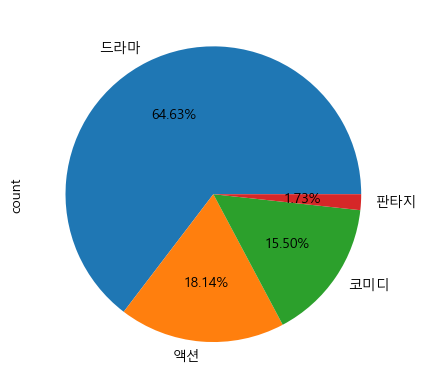

In [87]:
chartData.plot(kind='pie', autopct='%1.2f%%')


In [88]:
genre_filter = ['드라마', '애니메이션', '범죄', '코미디', '스릴러']
genre_result = kmdb[kmdb['대표 장르'].isin(genre_filter)]
genre_result['대표 장르'].unique()

array(['코미디', '드라마', '애니메이션', '범죄', '스릴러'], dtype=object)

In [89]:
# groupby('a')['b'] : a로 그룹핑 해주세요.
genreGrouping = genre_result.groupby('대표 장르')['대표 장르']
genreChart = genreGrouping.count().sort_values() #b에 대한 개수를 구해주세요.
genreChart.to_frame()

,대표 장르
대표 장르,
범죄,1523
스릴러,1870
코미디,5277
애니메이션,8638
드라마,22003


<Axes: xlabel='대표 장르'>

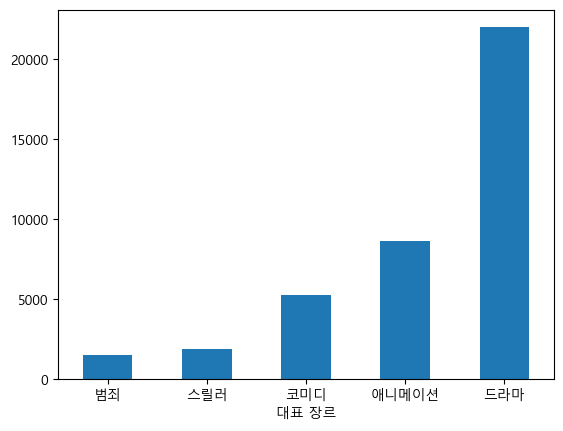

In [90]:
genreChart.plot(kind='bar', rot=0)

In [91]:
filter_nation = ['미국', '일본', '중국', '한국']
nation_name_data = kmdb[kmdb['대표 제작 국가'].isin(filter_nation)]
nation_name_data['대표 제작 국가'].unique()

array(['한국', '일본', '미국', '중국'], dtype=object)

In [92]:
nation_name_grouping = nation_name_data.groupby('대표 제작 국가')['대표 제작 국가']
nation_name_chart = nation_name_grouping.count().sort_index(ascending=False) # 색인 기반 오름차 정렬
nation_name_chart.to_frame()

,대표 제작 국가
대표 제작 국가,
한국,33049
중국,1951
일본,11963
미국,15761


<Axes: ylabel='대표 제작 국가'>

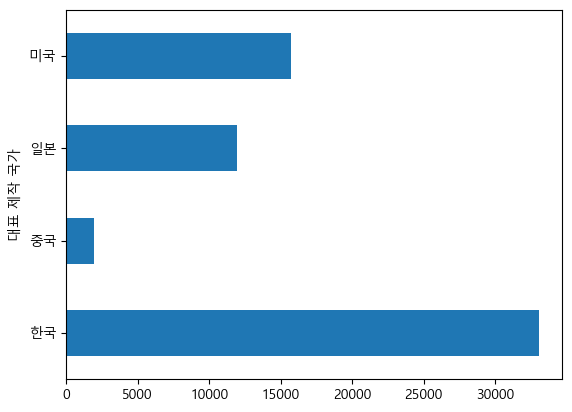

In [93]:
nation_name_chart.plot(kind='barh', rot=0)

In [96]:
nation = ['한국', '미국', '일본']
genre = ['범죄', '코미디', '스릴러', '뮤지컬']

result = kmdb[kmdb['대표 제작 국가'].isin(nation)]
result = result[result['대표 장르'].isin(genre)]

In [98]:
resultGroup = result.groupby(['대표 제작 국가', '대표 장르'])['대표 제작 국가']
barChartData = resultGroup.count().to_frame()
barChartData = barChartData.rename(columns={'대표 제작 국가':'cnt'})
barChartData.reset_index()

,대표 제작 국가,대표 장르,cnt
0,미국,뮤지컬,88
1,미국,범죄,670
2,미국,스릴러,787
3,미국,코미디,2054
4,일본,범죄,64
5,일본,스릴러,79
6,일본,코미디,241
7,한국,뮤지컬,73
8,한국,범죄,205
9,한국,스릴러,422


In [101]:
barChart = pd.pivot_table(barChartData, index='대표 제작 국가', columns=('대표 장르'), values='cnt', aggfunc='mean')
barChart

대표 장르,뮤지컬,범죄,스릴러,코미디
대표 제작 국가,,,,
미국,88.0,670.0,787.0,2054.0
일본,NaN,64.0,79.0,241.0
한국,73.0,205.0,422.0,969.0


Text(0.5, 1.0, '국가별 장르별 다변량 수직 막대 그래프')

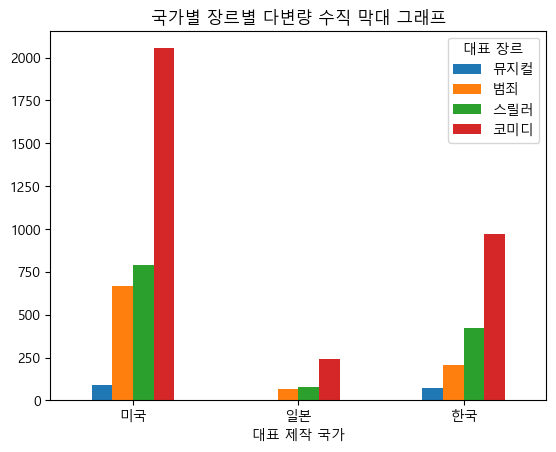

In [102]:
barChart.plot(kind='bar', rot=0)
plt.title('국가별 장르별 다변량 수직 막대 그래프')

Text(0.5, 1.0, '장르별 국가별 다변량 수직 막대 그래프')

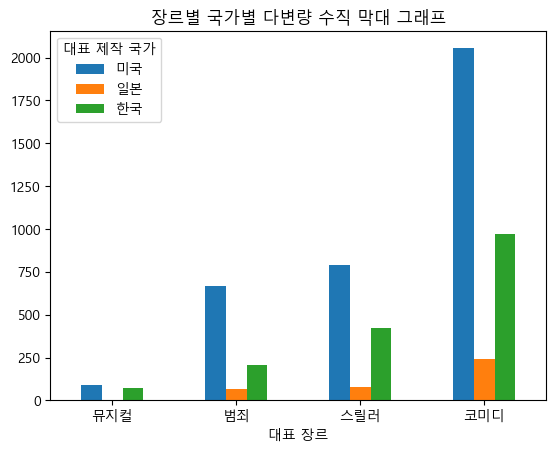

In [103]:
barChart.T.plot(kind='bar', rot=0)
plt.title('장르별 국가별 다변량 수직 막대 그래프')